# Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing

# Marketing domain



In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable

# Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Adverstiment Dataset
>The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles 
>like radio, tv and newspaper.

### Attribution Descriptions
>TV - Spend on TV Advertisements <br>
>Radio - Spend on radio Advertisements <br>
>Newspaper - Spend on newspaper Advertisements <br>
>Sales - Sales revenue generated <br>
Note: The amounts are in diffrent units

In [2]:

Data = pd.read_csv("C://Users//Lenovo//Downloads//advertising.csv")
Data.head(4)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5


# Data inspection

In [3]:
Data.shape

(200, 4)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


# Data Cleaning

In [6]:
# Checking Null values
Data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
# There are no considerable outliers present in the data.

In [8]:
Data.dtypes
#Data.isnull().sum()#
# # T is for Transpose

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
# Step 2 - EDA 

# EDA - Exploratory Data Analysis | Data Audit

# After importing : Immediate step is to get the friendship with the data.

# Regular available function

# Data.shape        # R : dim() 
# Data.columns    # R : names()
#Data.head(2)    # R : head()
# Data.tail(2)    # R : tail()
#Data.info()   # R : str()
Data.describe().T # R : summary()
# Data.isnull()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [10]:
import pandas_profiling

In [11]:
pandas_profiling.ProfileReport(Data) # complete HTML overall Summarised report 

 # This is one package for EDA doesnot means that it is the only package


# lot of other packages could be there for you to get the same job being done even more smartly 
# or in detailed EDA | What I may not have got the chance to look for ?
#__________________________________________________________________________________________________________________________
# SweetViz
# Pandas-Profiling
# Sweetviz
# Autoviz
# D-Tale
# AutoPlotter - A GUI based Exploratory Data Analysis in Python
# PyEDA



Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
Data.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [13]:
# Creating Data audit Report
# Use a general function that returns multiple values

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25/Q1' ,'P50/Q2' ,'P75/Q3' ,'P90' ,'P95' ,'P99' ,'MAX'])




In [14]:
def var_summary(x):
    uc = x.mean()+(2*x.std())
    lc = x.mean()-(2*x.std())
    
    for i in x:
        if i<lc or i>uc:
            count = 1
        else:
            count = 0
    outlier_flag = count
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max() , lc , uc,outlier_flag],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX','LC','UC','outlier_flag'])



# UC = MEAN + 2 STD


In [15]:
Data.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,...,P25,P50,P75,P90,P95,P99,MAX,LC,UC,outlier_flag
TV,200.0,0.0,29408.5,147.0425,149.75,85.854236,7370.949893,0.7,5.387,13.195,...,74.375,149.75,218.825,261.44,280.735,292.907,296.4,-24.665973,318.750973,0.0
Radio,200.0,0.0,4652.8,23.2640,22.90,14.846809,220.427743,0.0,0.399,1.995,...,9.975,22.90,36.525,43.52,46.810,49.400,49.6,-6.429618,52.957618,0.0
Newspaper,200.0,0.0,6110.8,30.5540,25.75,21.778621,474.308326,0.3,0.999,3.600,...,12.750,25.75,45.100,59.07,71.825,89.515,114.0,-13.003242,74.111242,0.0
Sales,200.0,0.0,3026.1,15.1305,16.00,5.283892,27.919517,1.6,4.784,6.600,...,11.000,16.00,19.050,21.71,23.800,25.507,27.0,4.562715,25.698285,0.0


In [16]:
#var_summary(advt.TV)
var_summary(Data.Newspaper)

N                200.000000
NMISS              0.000000
SUM             6110.800000
MEAN              30.554000
MEDIAN            25.750000
STD               21.778621
VAR              474.308326
MIN                0.300000
P1                 0.999000
P5                 3.600000
P10                5.990000
P25               12.750000
P50               25.750000
P75               45.100000
P90               59.070000
P95               71.825000
P99               89.515000
MAX              114.000000
LC               -13.003242
UC                74.111242
outlier_flag       0.000000
dtype: float64

# Data Cleaning

In [17]:
#### Data Cleaning starts from here After my Extensive EDA 

In [18]:
Data["Newspaper"] = Data.Newspaper.clip(lower = 10  , upper = 100)

In [19]:
var_summary(Data.Newspaper)

N                200.000000
NMISS              0.000000
SUM             6267.100000
MEAN              31.335500
MEDIAN            25.750000
STD               20.537900
VAR              421.805316
MIN               10.000000
P1                10.000000
P5                10.000000
P10               10.000000
P25               12.750000
P50               25.750000
P75               45.100000
P90               59.070000
P95               71.825000
P99               89.506000
MAX              100.000000
LC                -9.740299
UC                72.411299
outlier_flag       0.000000
dtype: float64

In [20]:
# Handling Outliers | I am capping that with Var > P99 then Var = P99 [Upper CAP]
#                                         Var < P01 then Var = P01 [Lower CAP]

Data['Sales'] = Data['Sales'].clip(lower = 10, upper = 100)

In [21]:
var_summary(Data.Sales)

N                200.000000
NMISS              0.000000
SUM             3119.200000
MEAN              15.596000
MEDIAN            16.000000
STD                4.583725
VAR               21.010537
MIN               10.000000
P1                10.000000
P5                10.000000
P10               10.000000
P25               11.000000
P50               16.000000
P75               19.050000
P90               21.710000
P95               23.800000
P99               25.507000
MAX               27.000000
LC                 6.428550
UC                24.763450
outlier_flag       0.000000
dtype: float64

# Missing Values Treatment

In [22]:
# Handling Missings
# Fill with mean

Data['Sales']=Data['Sales'].fillna(Data['Sales'].mean())

In [23]:
# LET us Suppose | you are all done with Data Understanding | CLeaning 
#_______________________________________________________________________________
# Now you have to take care of REgression related Rules and assumption

In [24]:
# Distribution of variables
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Sales', ylabel='Density'>

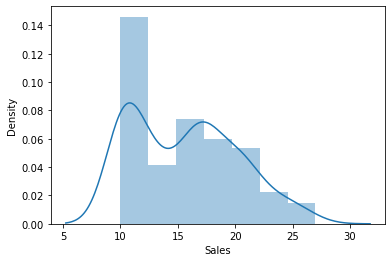

In [25]:
# To check the normality if Y[Sales]
#________________________________________________________________
# Choice 1- You could got the job being done with  - SEABORN PACKAGE
sns.distplot(Data.Sales) 

# Choice 2 - I could have got the same job being done with - PANDAS itself
#Data.Sales.hist() # uvivariate


<AxesSubplot:>

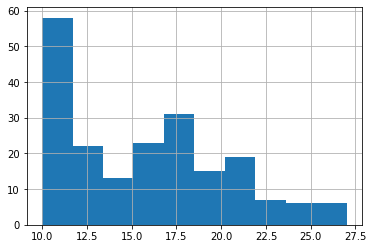

In [26]:
Data.Sales.hist()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

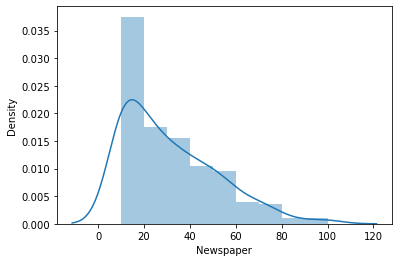

In [27]:
sns.distplot( Data.Newspaper )

<AxesSubplot:>

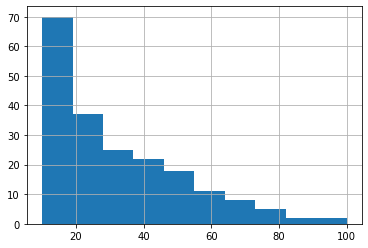

In [28]:
Data.Newspaper.hist()

<AxesSubplot:xlabel='Radio', ylabel='Density'>

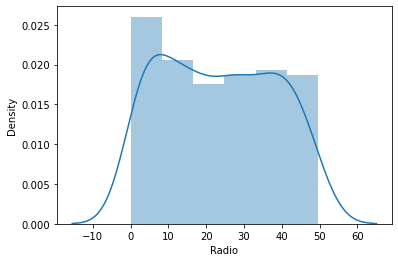

In [29]:
sns.distplot(Data.Radio)

<AxesSubplot:xlabel='TV', ylabel='Density'>

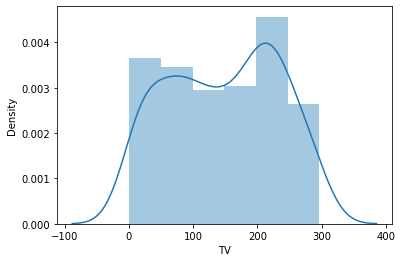

In [30]:
sns.distplot( Data.TV)

### Notes:
>Sales seems to be normal distribution. Spending on newspaper advertisement seems to be righ skewed.
Most of the spends on newspaper is fairly low where are spend on radio and tv seems be uniform distribution. 
Spends on tv are comparatively higher then spens on radio and newspaper.

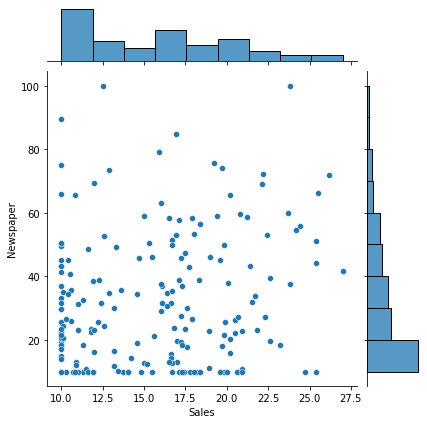

In [31]:
# Assumption No. 3  - Is there a relationship between sales and spend various advertising channels?

# Sales Vs. Newspaper advertisement spends
# Both Bi-variate(Scatter) + Univariate(Histogram)

sns.jointplot( Data.Sales, Data.Newspaper)

##### This shows that Newspaper is not having strong relationship which violates the  3rd assumption of regression
##### Hence I can delete the variable right away 
#####  But I am not deleting in this case study at this step because I wanted you to see the statistical sense as well later on. is the reason I will continue with this as of now

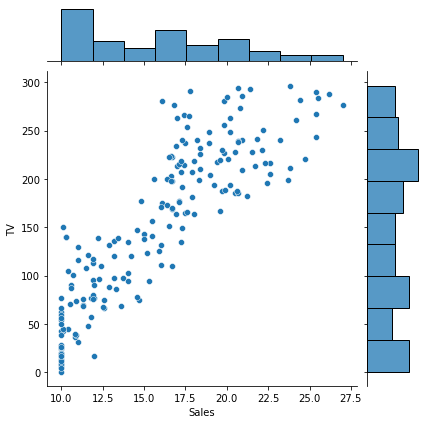

In [32]:
#Sales Vs. TV advertisement spends

sns.jointplot( Data.Sales, Data.TV)

# Notes
>Sales and spend on newpaper is not highly correlaed where are sales and spend on tv is highly correlated.

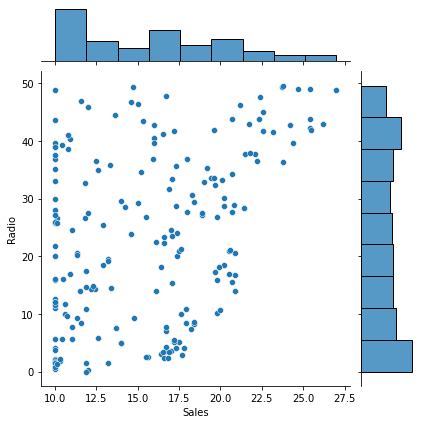

In [33]:
#Sales Vs. Radio advertisement spends

sns.jointplot( Data.Sales, Data.Radio)

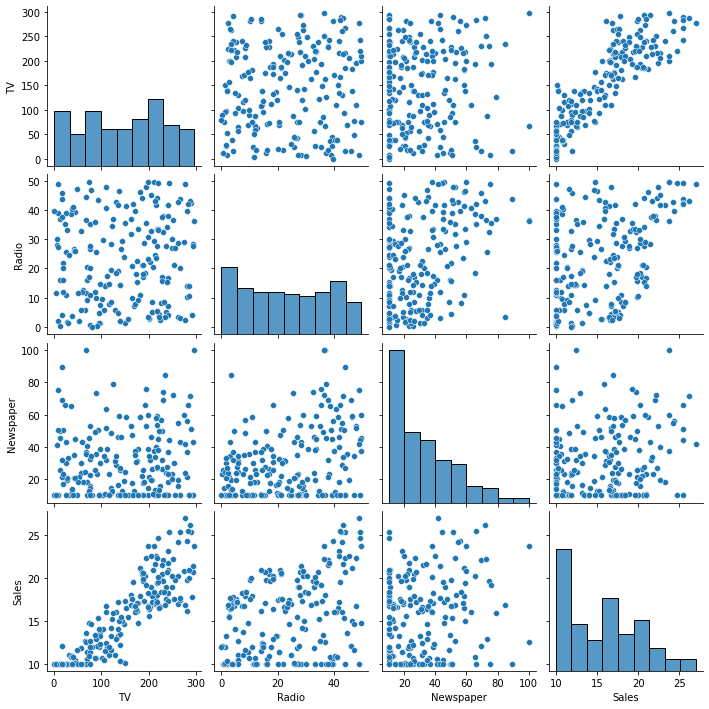

In [34]:
# Visualizing pairwise correleation )

sns.pairplot ( Data)

In [35]:
# Calculating correlations

Data.TV.corr( Data.Sales)

0.883655853451101

In [36]:
Data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.065510,0.883656
Radio,0.054809,1.000000,0.368934,0.378195
Newspaper,0.065510,0.368934,1.000000,0.174389
Sales,0.883656,0.378195,0.174389,1.000000


<AxesSubplot:>

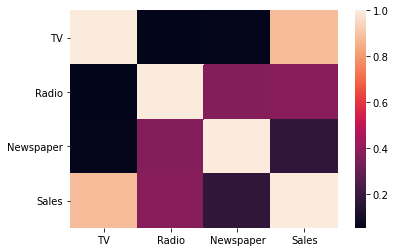

In [37]:
# Visualizing the correlations
#The darker is the color, the stronger is the correlation

sns.heatmap( Data.corr())

### NOTES:
> The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation betweeb TV and Sales is highest i.e. 0.88 and then betweeb sales and radio
> correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. 

### Building Regression Model
> Linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression <br>
> A simple linear regression model is given by Y=mX+b <br>
> where m is the slope and b is the y-intercept. Y is the dependent variable and X is the explanatory variable. <br>
> Very briefly and simplistically, Linear Regression is a class of techniques for fitting a straight line to a set of data points

In [38]:
import statsmodels.formula.api as smf

import pandas as pd

#Python module - classes and functions for the estimation - statistical models, - smf


In [39]:
lm = smf.ols('Sales ~ TV + Radio + Newspaper', Data).fit() # Ordinary Least Square method : For Regression MOdel
# method for estimating the unknown parameters in a linear regression model.

In [40]:
lm.summary()

# Things to check and interpretation in the result SUMMARY
#_______________________________________________________________________________

# 1- R2                | IDeally it should be greater .60 - 
                         #After fitting a linear regression model, you need to determine how well the model fits the data
                           # % of variance in the dependent variable that the independent variables explain collectively
                                 #the strength of the relationship between your model 
# 2- ADjusted R2        | IDeally it should be close and similar to R2 | [R2 > = Adj R2]
# 3- there should not be much different begtween R2 and Adj R2 | Why ?

# 4- F STatistics - ANOVA
#   (generally used when to compare a second iterated model with the first previous one)

# 5- to check teh P value of each variable
#   to detect its sginificance in my model
    
# Ho - X1 is not having impact on Sales |
         # because >> Beta1 = 0

# Ha = Beta1 # 0
    
#     in this case News Paper is accepted having P 0.86> 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     528.3
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           1.27e-93
Time:                        12:21:34   Log-Likelihood:                -367.12
No. Observations:                 200   AIC:                             742.2
Df Residuals:                     196   BIC:                             755.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4457      0.287     22.444      0.000       5.879       7.012
TV             0.0462      0.001     36.437      0.000       0.044       0.049
Radio          0.1027      0.008     13.039      0.000       0.087       0.118
Newspaper     -0.0011      0.006     -0.197      0.844      -0.012       0.010
==============================================================================
Omnibus:                        1.550   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.592
Skew:                           0.158   Prob(JB):                        0.451
Kurtosis:                       2.698   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### rerunning the model again, removing the news paper from the list 

In [41]:
lm = smf.ols('Sales ~ TV + Radio', Data ).fit() # rerunning the model again, removing the news paper from the list 

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     796.3
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           4.06e-95
Time:                        12:21:34   Log-Likelihood:                -367.14
No. Observations:                 200   AIC:                             740.3
Df Residuals:                     197   BIC:                             750.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4255      0.268     24.001      0.000       5.898       6.953
TV             0.0462      0.001     36.560      0.000       0.044       0.049
Radio          0.1021      0.007     13.971      0.000       0.088       0.117
==============================================================================
Omnibus:                        1.557   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.606
Skew:                           0.162   Prob(JB):                        0.448
Kurtosis:                       2.704   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Getting model parameters
lm.params

Intercept    6.425513
TV           0.046210
Radio        0.102116
dtype: float64

In [44]:
# Parameters at 95% confidence intervals

lm.conf_int()

,0,1
Intercept,5.897552,6.953475
TV,0.043718,0.048703
Radio,0.087702,0.116530


In [45]:
from sklearn import metrics

In [46]:
print(dir(metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_los

### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> R-squared = Explained variation / Total variation <br>
> Total variation is variation of response variable around it's mean. <br>
> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
> while 100% signifies that the model explains all the variability of the response. <br>
> The closer the r-square to 100%, the better is the model. <br>

In [47]:
lm.rsquared

0.8899187325133527

In [48]:
round(  float (lm.rsquared) , 2)

0.89

In [49]:
### MAKING PREDICTIONS - Applying the model 
ltmpredic = lm.predict(Data)

# ltmpredic - this is your Y cap

In [50]:
ltmpredic[1:10]

1    12.495023
2    11.907450
3    17.643745
4    15.883167
5    11.821011
6    12.432002
7    13.981450
8     7.037364
9    15.923810
dtype: float64

In [58]:
# After building the model,  now have to find teh accuracy ?
# ACcuracy can be maeasured with - RMSE 


from sklearn import metrics # Provides the Various Peformance Evaluation MAtrices either for Reg or classification

In [59]:
print( dir ( metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_los

### Calculating mean square error ... RMSE
> RMSE calculate the difference between the actual value and predicted value of the response variable <br>
> The square root of the mean/average of the square of all of the error. <br> 
> Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors. <br>
> The lesser the RMSE value, the better is the model.

In [53]:
mse =  metrics.mean_squared_error( Data.Sales, ltmpredic) 

In [54]:
rmse = np.sqrt ( mse)

In [55]:
rmse

1.5170043428223352

In [56]:
#Get the residuals and plot them
lm.resid[1:10]

1   -2.095023
2    0.092550
3   -1.143745
4    2.016833
5   -1.821011
6   -0.632002
7   -0.781450
8    2.962636
9   -0.323810
dtype: float64

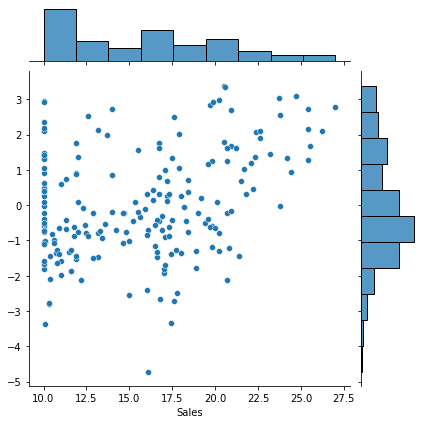

In [57]:
sns.jointplot ( Data.Sales , lm.resid)